In [6]:
## STock analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
import pandas_datareader.data as web
from datetime import datetime


In [51]:
end = datetime.now()
end.year
start = datetime(end.year - 1, 1, 1)

In [52]:
print(start.date())

2023-01-01


In [53]:
print(end.date())

2024-05-10


In [54]:
AAPL = pdr.get_data_yahoo("AAPL",start.date(),end.date())
MSFT = pdr.get_data_yahoo("MSFT",start.date(),end.date())
TSLA = pdr.get_data_yahoo("TSLA",start.date(),end.date())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [55]:
AAPL['Adj Close']

Date
2023-01-03    124.216293
2023-01-04    125.497498
2023-01-05    124.166641
2023-01-06    128.735245
2023-01-09    129.261627
                 ...    
2024-05-03    183.380005
2024-05-06    181.710007
2024-05-07    182.399994
2024-05-08    182.740005
2024-05-09    184.570007
Name: Adj Close, Length: 340, dtype: float64

In [56]:
df = pd.DataFrame({
 'AAPL':AAPL['Adj Close'],'MSFT':MSFT['Adj Close'],'TSLA':TSLA['Adj Close']
})

In [57]:
df.head()

,AAPL,MSFT,TSLA
Date,,,
2023-01-03,124.216293,237.035995,108.099998
2023-01-04,125.497498,226.667297,113.639999
2023-01-05,124.166641,219.949387,110.339996
2023-01-06,128.735245,222.541550,113.059998
2023-01-09,129.261627,224.708298,119.769997


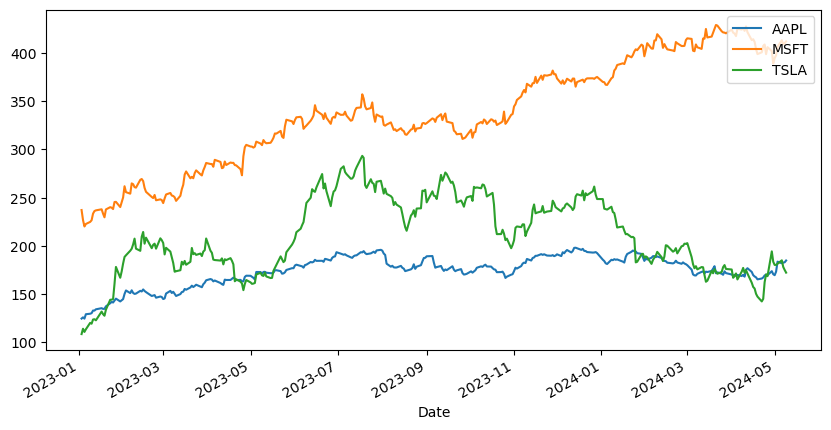

In [58]:
df.plot(figsize=(10,5))
plt.legend(loc='upper right')

In [59]:
df['AAPL']

Date
2023-01-03    124.216293
2023-01-04    125.497498
2023-01-05    124.166641
2023-01-06    128.735245
2023-01-09    129.261627
                 ...    
2024-05-03    183.380005
2024-05-06    181.710007
2024-05-07    182.399994
2024-05-08    182.740005
2024-05-09    184.570007
Name: AAPL, Length: 340, dtype: float64

In [60]:
df['MSFT']

Date
2023-01-03    237.035995
2023-01-04    226.667297
2023-01-05    219.949387
2023-01-06    222.541550
2023-01-09    224.708298
                 ...    
2024-05-03    406.660004
2024-05-06    413.540009
2024-05-07    409.339996
2024-05-08    410.540009
2024-05-09    412.320007
Name: MSFT, Length: 340, dtype: float64

In [62]:
df['TSLA']

Date
2023-01-03    108.099998
2023-01-04    113.639999
2023-01-05    110.339996
2023-01-06    113.059998
2023-01-09    119.769997
                 ...    
2024-05-03    181.190002
2024-05-06    184.759995
2024-05-07    177.809998
2024-05-08    174.720001
2024-05-09    171.970001
Name: TSLA, Length: 340, dtype: float64

/var/folders/8z/wspwslw53z54yzsmtv5qzw2h0000gn/T/ipykernel_25025/2063007878.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = df.apply(lambda x: x / x[0])


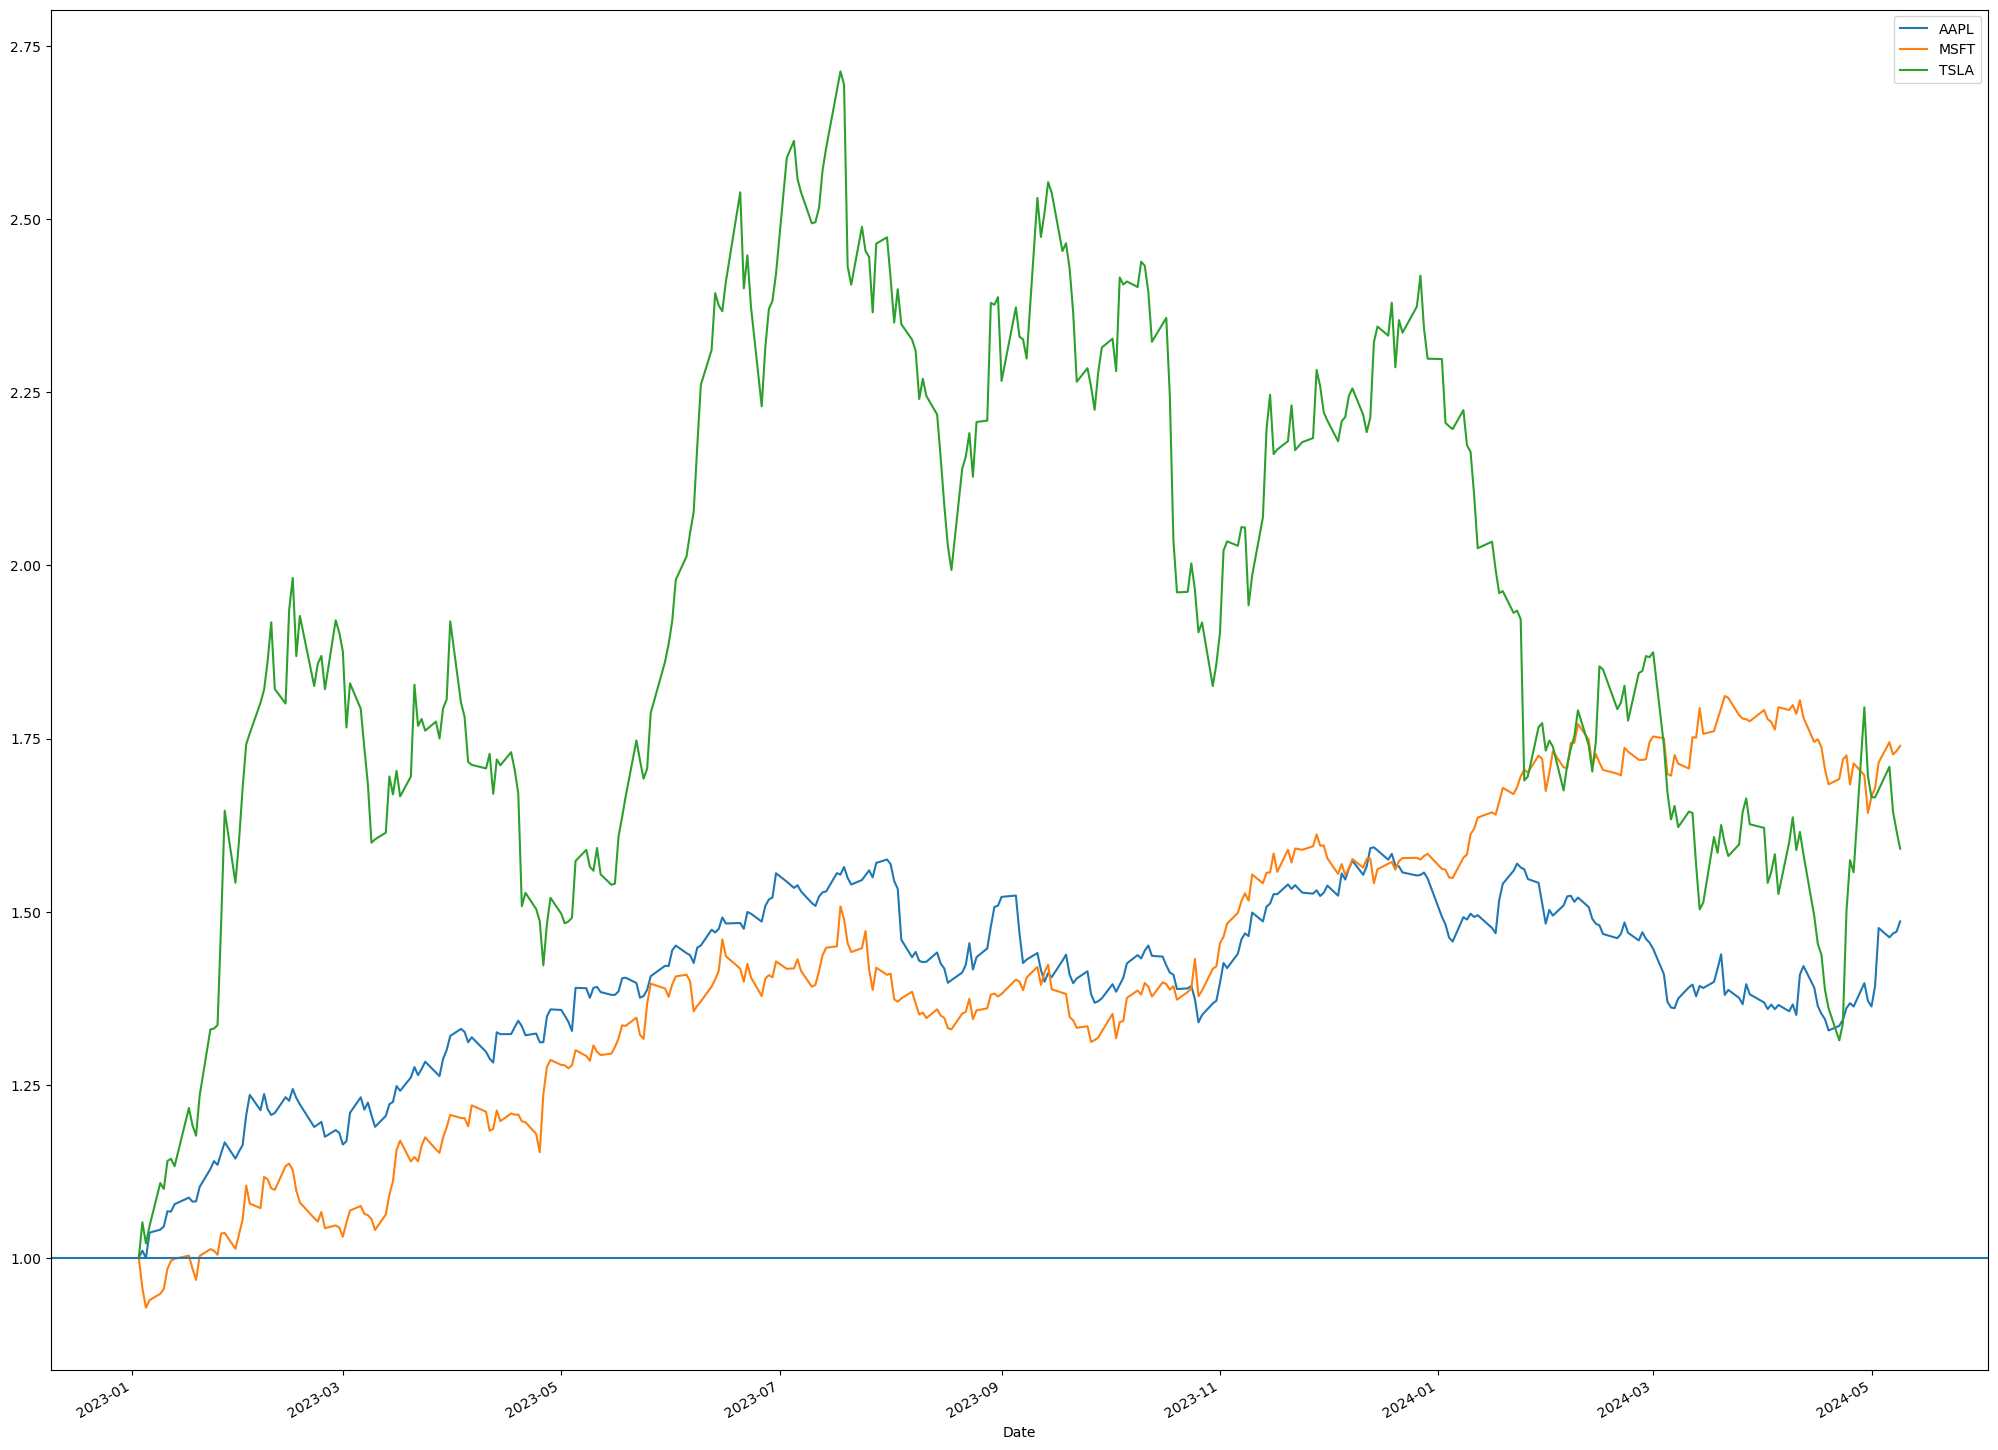

In [64]:
start = df.apply(lambda x: x / x[0])
start.plot(figsize=(25,20)).axhline(1)

In [23]:
start

,AAPL,MSFT,FB
Date,,,
2020-01-02,1.000000,1.000000,1.000000
2020-01-03,0.990278,0.987548,0.994709
2020-01-06,0.998169,0.990101,1.013443
2020-01-07,0.993474,0.981073,1.015635
2020-01-08,1.009455,0.996700,1.025932
...,...,...,...
2020-08-14,1.540872,1.307770,1.245305
2020-08-17,1.536849,1.316409,1.244923
2020-08-18,1.549655,1.323984,1.250548


In [74]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.arima.model import ARIMA

# Trends # Seasonality # Cyclic # Random or irregular
#A Time series is stationary if 
#The test statictics is less than the critical values 
#The p-value is less than 0.5

def DF(series):
    
    series = series.dropna()

    print('Dickey Fuller Test')
    test = adfuller(series, autolag='AIC')

    output = pd.Series(test[0:2], index=['Test Statistic','p-value'])
    
    for key,value in test[4].items():
        output['Critical Value (%s)'%key] = value

    print(output)
    print()
    
    if test[1] <= 0.05:
        print("The Time-Series is Stationary\n")
    else:
        print("The Time-Series is Not Stationary\n")


<Axes: xlabel='Date'>

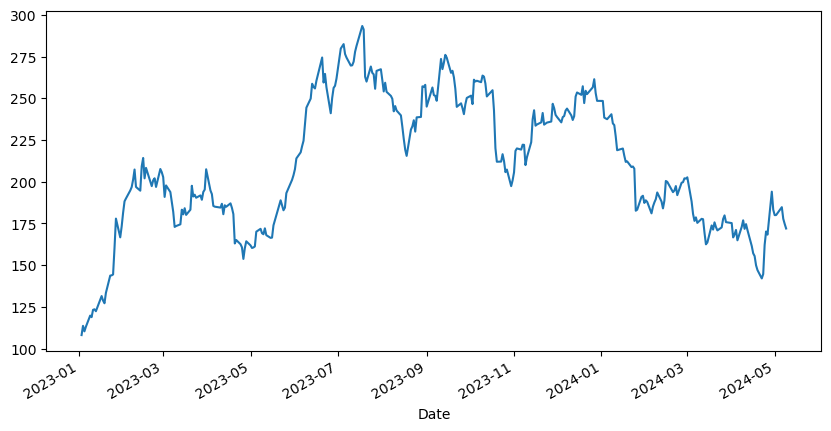

In [75]:
plt.figure(figsize=(10,5))
df['TSLA'].plot()

In [76]:
    def trendtransformation(series):
    
        #Log transaformation of the values
        LogTransformation = series.apply(lambda x: np.log(x))
        LogTransformation = LogTransformation.dropna()
        
        # Transformation of the values to the power 0.5
        PowerTransformation = series.apply(lambda x: x ** 0.5)
        PowerTransformation = PowerTransformation.dropna()
        
        #Obtaining difference between the series and its rolling window
        rollingmean = series.rolling(window=12).mean()
        detrend = series - rollingmean
        detrend = detrend.dropna()
        
        #Plotting the transformed values of the series
        
        #Plotting the transformed values of the series
        plt.figure(figsize=(15,5))

        plt.subplot(2,2,1)
        series.plot()
        plt.title("Original Value")

        plt.subplot(2,2,2)
        LogTransformation.plot()
        plt.title("Log Transformation Value")

        plt.subplot(2,2,3)
        PowerTransformation.plot()
        plt.title("Power Transformation Value")

        plt.subplot(2,2,4)
        detrend.plot()
        plt.title("Rolling Mean Value")

        plt.tight_layout(pad=0.5)
        plt.show(block=False)
        
        print("***** Log Transformation *****")
        DF(LogTransformation)
        print("***** Power Transformation *****")
        DF(PowerTransformation)
        print("***** Rolling Mean *****")
        DF(detrend)

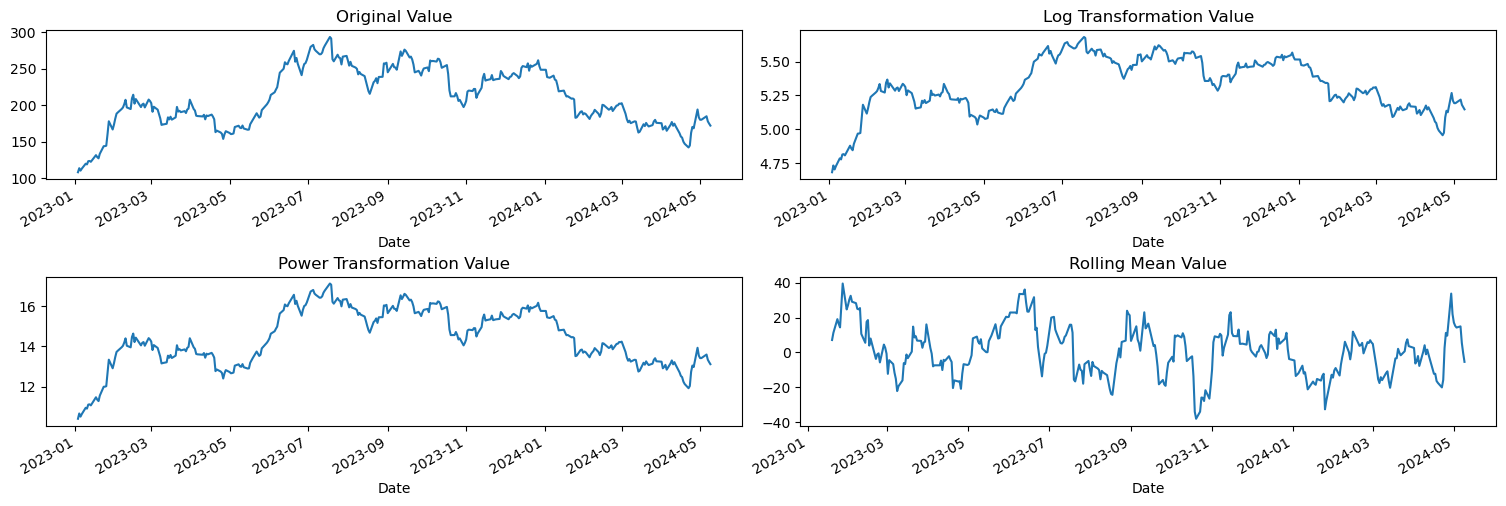

***** Log Transformation *****
Dickey Fuller Test
Test Statistic         -3.112428
p-value                 0.025647
Critical Value (1%)    -3.449788
Critical Value (5%)    -2.870104
Critical Value (10%)   -2.571332
dtype: float64

The Time-Series is Stationary

***** Power Transformation *****
Dickey Fuller Test
Test Statistic         -2.747687
p-value                 0.066144
Critical Value (1%)    -3.449788
Critical Value (5%)    -2.870104
Critical Value (10%)   -2.571332
dtype: float64

The Time-Series is Not Stationary

***** Rolling Mean *****
Dickey Fuller Test
Test Statistic         -4.396921
p-value                 0.000301
Critical Value (1%)    -3.450445
Critical Value (5%)    -2.870392
Critical Value (10%)   -2.571486
dtype: float64

The Time-Series is Stationary



In [77]:
trendtransformation(df['TSLA'])

In [87]:
rollingmean = df['TSLA'].rolling(window = 12).mean()
tsla = df['TSLA'] - rollingmean
tsla = tsla.dropna()

<Figure size 1200x800 with 0 Axes>

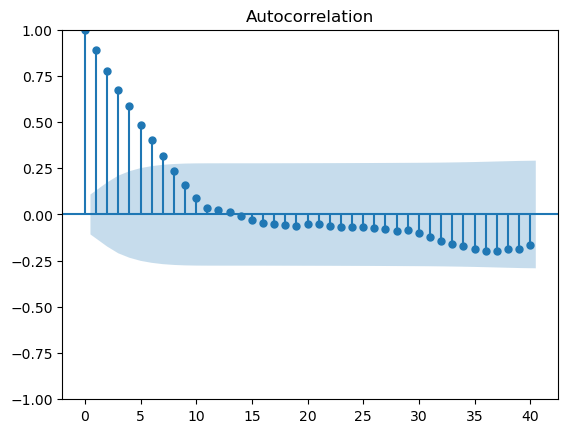

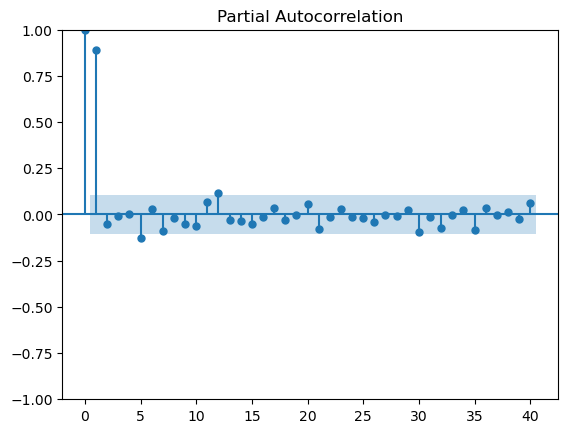

In [88]:
#Model Building

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


plt.figure(figsize=(12,8))

plot_acf(tsla,lags=40)
plot_pacf(tsla,lags=40)
plt.show()


In [89]:
model=ARIMA(tsla,order=(1,0,1))
model_fit=model.fit()

/Users/sandeepsangole/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sandeepsangole/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sandeepsangole/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [90]:
fbforecast=model_fit.predict()

<Axes: xlabel='Date'>

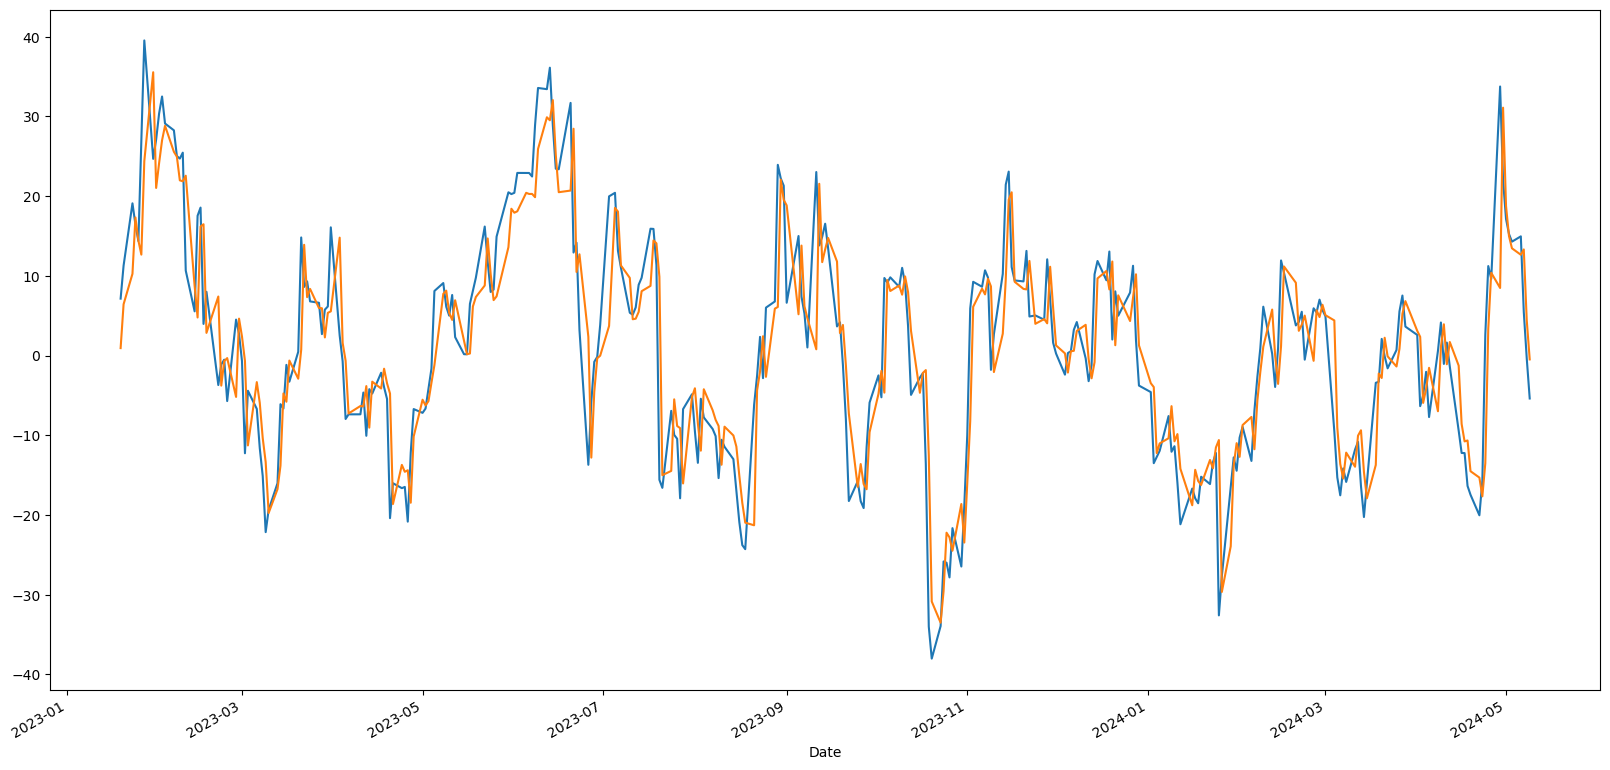

In [91]:
fb.plot()
fbforecast.plot(figsize=(20,10))
